<h1>Bathymetry at Duck FRF During DUNEX</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import cmocean
import matplotlib.animation as animation
%matplotlib widget

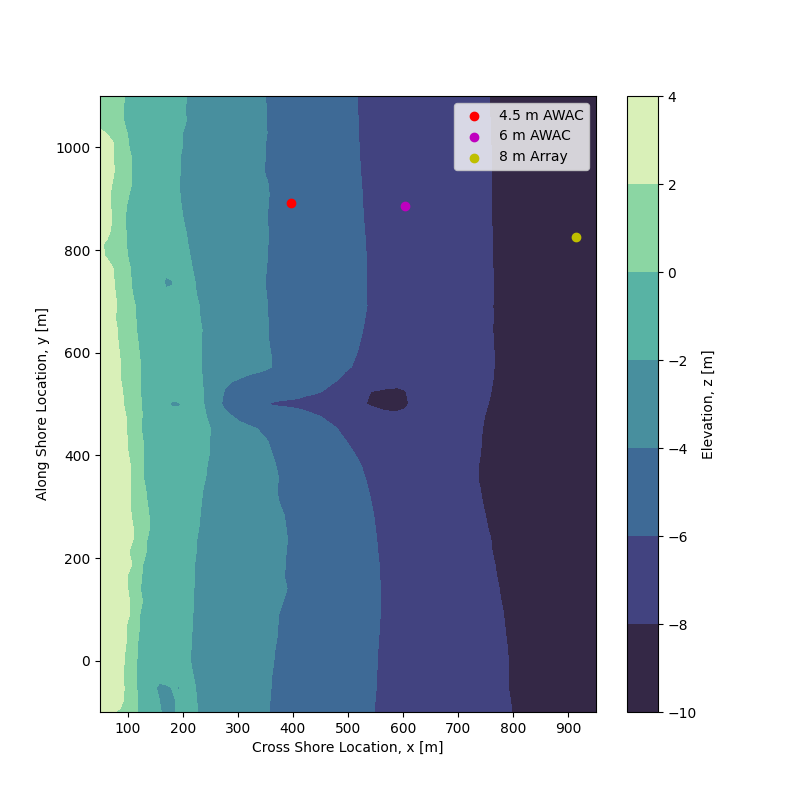

In [2]:
  # Add the FRF Bathymetry to the map 
# Data from September 28th, 2021
# bathy_url = 'https://chlthredds.erdc.dren.mil/thredds/dodsC/frf/geomorphology/DEMs/surveyDEM/data/FRF_geomorphology_DEMs_surveyDEM_20210928.nc'
bathy_file = '../microSWIFT_data/FRFdata/FRF_geomorphology_DEMs_surveyDEM_20211021.nc'
bathy_dataset = nc.Dataset(bathy_file)
# Create grid from coordinates
xFRF_grid, yFRF_grid = np.meshgrid(bathy_dataset['xFRF'][:],bathy_dataset['yFRF'][:])
bathy = bathy_dataset['elevation'][0,:,:]

# Fixed Instrument Locations
awac4p5m_location = [397.35, 890.98] # Converted from lat lon locations published on FRF data portal
awac6m_location = [603.12, 886.68]   # Converted from lat lon locations published on FRF data portal
array8m_location = [914.05, 826.08]  # Nominal location based on published data even though this array has multiple locations

# Plot the Bathymetry 
fig_bathy, ax= plt.subplots(figsize=(8,8))
im = ax.contourf(xFRF_grid, yFRF_grid, bathy, cmap=cmocean.cm.deep_r)
ax.set_xlabel('Cross Shore Location, x [m]')
ax.set_ylabel('Along Shore Location, y [m]')
cbar = fig_bathy.colorbar(im)
cbar.ax.set_ylabel('Elevation, z [m]')

# Plot the Location of the 4.5 m AWAC, 6 m AWAC and 8 m Array and Pier
ax.scatter(awac4p5m_location[0],awac4p5m_location[1], color='r', label='4.5 m AWAC')
ax.scatter(awac6m_location[0], awac6m_location[1], color='m', label='6 m AWAC')
ax.scatter(array8m_location[0], array8m_location[1], color='y', label='8 m Array')
ax.legend()

# Save the Figure 
fig_bathy.savefig('FRFBathy.png')

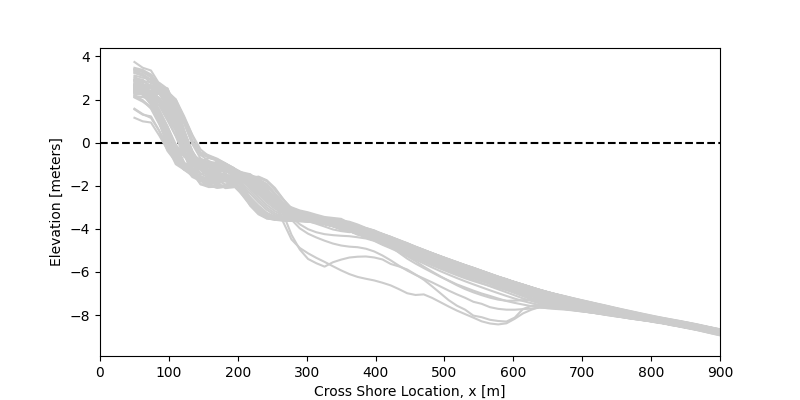

In [3]:
# Cross Shore Profile and Variability
fig_var, ax = plt.subplots(figsize=(8,4))
ax.set_xlabel('Cross Shore Location, x [m]')
ax.set_ylabel('Elevation [meters]')
ax.hlines(0, 0, 900, color='k', linestyle='dashed')
ax.set_xlim(0, 900)
for n in np.arange(bathy.shape[0]): 
    ax.plot(bathy_dataset['xFRF'][:], bathy[n,:], color='0.8')

# Average profile 
# ax.plot(bathy_dataset['xFRF'][:], np.nanmean(bathy, axis=0), color='k')



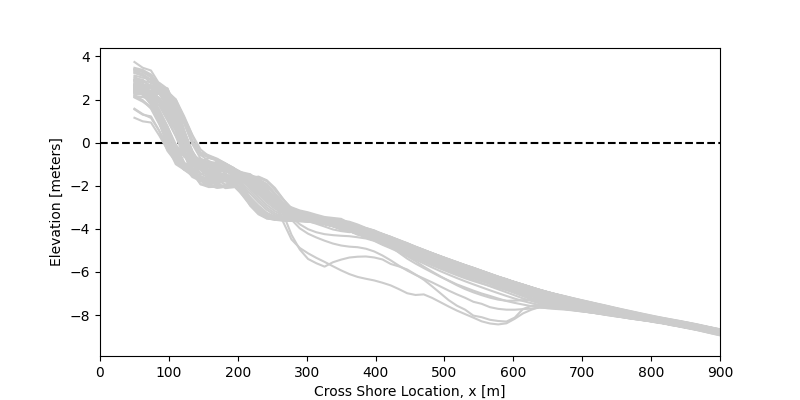

In [4]:
  # Add the FRF Bathymetry to the map 
# Data from September 28th, 2021
# bathy_url = 'https://chlthredds.erdc.dren.mil/thredds/dodsC/frf/geomorphology/DEMs/surveyDEM/data/FRF_geomorphology_DEMs_surveyDEM_20210928.nc'
bathy_file = '../microSWIFT_data/FRFdata/FRF_geomorphology_DEMs_surveyDEM_20211021.nc'
bathy_dataset = nc.Dataset(bathy_file)
# Create grid from coordinates
xFRF_grid, yFRF_grid = np.meshgrid(bathy_dataset['xFRF'][:],bathy_dataset['yFRF'][:])
bathy = bathy_dataset['elevation'][0,:,:]

# Fixed Instrument Locations
awac4p5m_location = [397.35, 890.98] # Converted from lat lon locations published on FRF data portal
awac6m_location = [603.12, 886.68]   # Converted from lat lon locations published on FRF data portal
array8m_location = [914.05, 826.08]  # Nominal location based on published data even though this array has multiple locations

# Cross Shore Profile and Variability
fig_var, ax = plt.subplots(figsize=(8,4))
ax.set_xlabel('Cross Shore Location, x [m]')
ax.set_ylabel('Elevation [meters]')
ax.hlines(0, 0, 900, color='k', linestyle='dashed')
ax.set_xlim(0, 900)
for n in np.arange(bathy.shape[0]): 
    ax.plot(bathy_dataset['xFRF'][:], bathy[n,:], color='0.8')

fig_bathyMovie = plt.figure(figsize=(8, 12))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)

def init_plot():
   im = ax1.contourf(xFRF_grid, yFRF_grid, bathy, cmap=cmocean.cm.deep_r)
   ax1.scatter(awac4p5m_location[0],awac4p5m_location[1], color='r', label='4.5 m AWAC')
   ax1.scatter(awac6m_location[0], awac6m_location[1], color='m', label='6 m AWAC')
   ax1.scatter(array8m_location[0], array8m_location[1], color='y', label='8 m Array')
   ax1.hlines(bathy_dataset['yFRF'][0], 0, 900, color='m', label='Transect')
   ax1.set_xlim(50, 900)
   ax1.legend()

   ax2.hlines(0, 0, 900, color='k', linestyle='dashed')
   ax2.set_xlim(50, 900)
   ax2.plot(bathy_dataset['xFRF'][:], bathy[0,:], color='m', label='Transect')
   ax2.plot(bathy_dataset['xFRF'][:], np.nanmean(bathy, axis=0), color='k', label='Mean Profile')
   ax2.legend()

def update_plot(index):
   ax1.clear()
   im = ax1.contourf(xFRF_grid, yFRF_grid, bathy, cmap=cmocean.cm.deep_r)
   ax1.scatter(awac4p5m_location[0],awac4p5m_location[1], color='r', label='4.5 m AWAC')
   ax1.scatter(awac6m_location[0], awac6m_location[1], color='m', label='6 m AWAC')
   ax1.scatter(array8m_location[0], array8m_location[1], color='y', label='8 m Array')
   ax1.hlines(bathy_dataset['yFRF'][index], 0, 900, color='m', label='Transect', linewidth=2)
   ax1.set_xlim(50, 900)
   ax1.legend()
   
   ax2.clear()
   ax2.hlines(0, 0, 900, color='k', linestyle='dashed')
   ax2.set_xlim(50, 900)
   ax2.set_ylim(-9, 4)
   ax2.plot(bathy_dataset['xFRF'][:], bathy[index,:], color='m', label='Transect')
   ax2.plot(bathy_dataset['xFRF'][:], np.nanmean(bathy, axis=0), color='k', label='Mean Profile')
   ax2.legend()

# Create Animation object
data_skip = 1
anim = animation.FuncAnimation(fig_bathyMovie, update_plot, frames=np.arange(0, bathy.shape[0], data_skip), init_func=init_plot)
anim.save('./bathyMovie.gif', dpi=150, fps=2, writer='pillow')

# Close dataset and figures
plt.close()